# 📘 Modul: Deteksi Pose Landmark dengan MediaPipe


## 📌 Pengantar: Apa Itu Pose Landmark?

Pose landmark adalah proses identifikasi titik-titik kunci (*keypoints*) pada tubuh manusia seperti kepala, mata, bahu, siku, pinggul, lutut, dan pergelangan kaki. Deteksi ini digunakan untuk memahami posisi dan pergerakan tubuh seseorang dari gambar atau video.

MediaPipe dari Google menyediakan solusi berbasis machine learning yang mampu mengenali hingga **33 landmark tubuh** secara akurat, bahkan dalam berbagai pose dan kondisi pencahayaan.

### 🧠 Mengapa Ini Penting?
Deteksi pose landmark banyak digunakan dalam:
- 🎮 **Interaksi manusia-komputer** seperti gesture control dalam game.
- 🧘 **Aplikasi kebugaran**, untuk koreksi postur saat berolahraga.
- 🚶 **Analisis biomekanik** untuk penelitian atau rehabilitasi.
- 🎥 **Efek video** yang mengikuti gerakan tubuh (augmented reality).

Dalam modul ini, kamu akan mempelajari cara mendeteksi pose landmark pada **gambar diam** dan secara **real-time** melalui kamera menggunakan **MediaPipe** dan **OpenCV**.


### 🧰 1. Instalasi Library

In [ ]:
!pip install mediapipe opencv-python

Instalasi dua library utama: `mediapipe` untuk deteksi landmark dan `opencv-python` untuk membaca dan menampilkan gambar/video.

### 📚 2. Import Library yang Dibutuhkan

In [4]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import os

Mengimpor library yang diperlukan:
- `cv2` untuk pemrosesan gambar dan video
- `mediapipe` untuk model pose landmark
- `matplotlib` untuk menampilkan gambar

### 🖼️ 3. Deteksi Pose Landmark dari Gambar

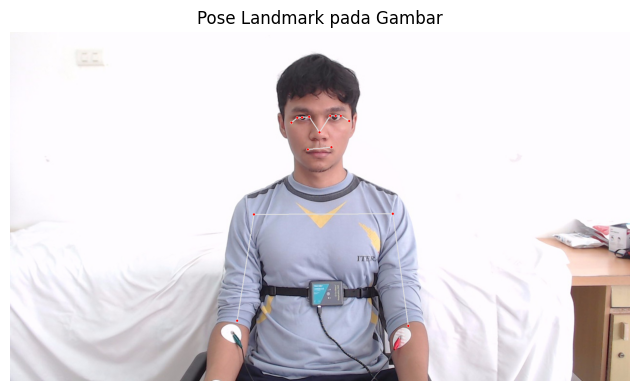

In [ ]:
# Menentukan path file gambar dengan menggabungkan direktori kerja saat ini, folder 'data', dan nama file gambar
img_path = os.path.join(os.getcwd(), 'data', 'sample_toby.jpg')

# Membaca gambar dari path tersebut menggunakan OpenCV (dalam format BGR)
img = cv2.imread(img_path)

# Mengonversi gambar dari BGR (standar OpenCV) ke RGB (standar MediaPipe dan Matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Inisialisasi modul pose dari MediaPipe
mp_pose = mp.solutions.pose

# Membuat instance dari pose detection model dengan mode gambar statis
pose = mp_pose.Pose(static_image_mode=True)

# Inisialisasi utilitas untuk menggambar landmark dari MediaPipe
mp_drawing = mp.solutions.drawing_utils

# Memproses gambar RGB untuk mendeteksi pose landmarks
results = pose.process(img_rgb)

# Jika landmark pose berhasil dideteksi
if results.pose_landmarks:
    # Gambar landmark dan koneksi antar titik di atas gambar asli
    mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

# Konversi kembali gambar ke format RGB untuk ditampilkan dengan Matplotlib
img_result = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Menampilkan hasil akhir dalam ukuran yang lebih besar
plt.figure(figsize=(8,6))
plt.imshow(img_result)       # Tampilkan gambar yang sudah diberi landmark
plt.axis('off')              # Hilangkan axis dari plot
plt.title('Pose Landmark pada Gambar')  # Judul plot
plt.show()                   # Tampilkan plot secara visual


**Penjelasan:**
- Inisialisasi MediaPipe Pose:
    - `mp_pose.Pose` adalah model deteksi pose dari MediaPipe.
    - Parameter `static_image_mode=True` berarti model akan dianggap hanya bekerja pada gambar diam, bukan video atau stream. Ini mengaktifkan pemrosesan satu kali tanpa pelacakan.
- Modul utilitas gambar: Digunakan untuk menggambar hasil landmark pada gambar (titik-titik tubuh dan koneksinya).
- Proses deteksi landmark: Gambar diproses oleh model pose untuk mendeteksi titik-titik pose (33 titik tubuh manusia).
- Gambar hasil landmark: Jika pose berhasil terdeteksi (`results.pose_landmarks` tidak kosong), landmark dan garis koneksi antar titik tubuh digambar langsung di gambar (img).

### 🎥 4. Deteksi Pose Landmark Secara Real-Time dari Kamera

In [1]:
import cv2
import mediapipe as mp

# Inisialisasi MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils

# Inisialisasi VideoCapture
cap = cv2.VideoCapture(0)

while cap.isOpened():  # Pastikan kamera terbuka
    # Baca frame dari video
    ret, frame = cap.read()
    if not ret:
        print("Gagal mengambil frame. Keluar...")
        break

    # Ubah warna frame menjadi RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Deteksi pose landmark
    results = pose.process(frame_rgb)

    # Gambar landmark pada frame
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    # Tampilkan frame
    cv2.imshow('Pose Landmark Detection', frame)

    # Tekan 'q' untuk keluar
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Tutup VideoCapture dan jendela OpenCV setelah loop selesai
cap.release()
cv2.destroyAllWindows()


**Penjelasan:**
- Inisialisasi Pose Detection:
    - `mp_pose` adalah referensi ke solusi pose dari MediaPipe.
    - `pose = mp_pose.Pose()` mempersiapkan model untuk mendeteksi pose tubuh.
    - `mp_drawing` digunakan untuk menggambar landmark tubuh (titik-titik dan koneksi antar titik) pada gambar/video.
-  Membuka kamera: `cv2.VideoCapture(0)` membuka kamera perangkat (indeks 0 untuk kamera default). Ini memungkinkan pemrosesan video secara real-time.
- Loop pemrosesan video:
    - Program akan terus berjalan selama kamera berhasil dibuka (`cap.isOpened()` mengembalikan True). Jika kamera tidak bisa dibuka, loop akan berhenti.
-  Membaca frame:
    - `cap.read()` membaca satu frame video. Jika gagal (`ret = False`), loop akan berhenti.
    - Jika gagal membaca frame, pesan akan ditampilkan dan program keluar.
- Konversi warna:
    - OpenCV menggunakan format BGR untuk gambar, tetapi MediaPipe memerlukan format RGB, jadi frame dikonversi ke RGB agar cocok untuk pemrosesan lebih lanjut.
-  Proses deteksi pose:
    - Gambar dalam format RGB diproses oleh model pose untuk mendeteksi titik-titik landmark tubuh (33 titik).
- Gambar landmark:
    - Jika deteksi pose berhasil (`results.pose_landmarks` ada), maka fungsi `draw_landmarks` menggambar titik-titik dan koneksi antar titik tubuh (misalnya: kepala, bahu, lutut) pada frame yang sedang diproses.
- Tampilkan hasil:
    - Menampilkan frame yang telah diproses dengan landmark yang digambar di jendela dengan nama 'Pose Landmark Detection'.
- Keluarkan dari loop:
    - Menunggu input dari keyboard. Jika tombol `q` ditekan, loop akan berhenti, dan program akan keluar.
- Tutup sumber daya:
    - Setelah loop selesai (misalnya karena menekan `q`), `cap.release()` menutup kamera, dan `c`v2.destroyAllWindows()` menutup semua jendela OpenCV yang telah dibuka.